In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Lets create some synthetic datasets**

In [3]:
from sklearn.datasets import make_classification

In [66]:
X,y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=2, n_redundant=0)

In [67]:
X

array([[ 0.96448076, -1.04085402],
       [ 1.26116854,  0.88727626],
       [-1.2266217 , -1.78612173],
       ...,
       [ 0.00863202,  0.25696899],
       [ 1.00112205, -1.18728237],
       [-0.49863721,  0.8742817 ]])

In [68]:
y

array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,

In [69]:
x = pd.DataFrame(X)

In [70]:
x.head()

,0,1
0,0.964481,-1.040854
1,1.261169,0.887276
2,-1.226622,-1.786122
3,-1.125021,1.087432
4,-1.410999,1.059361


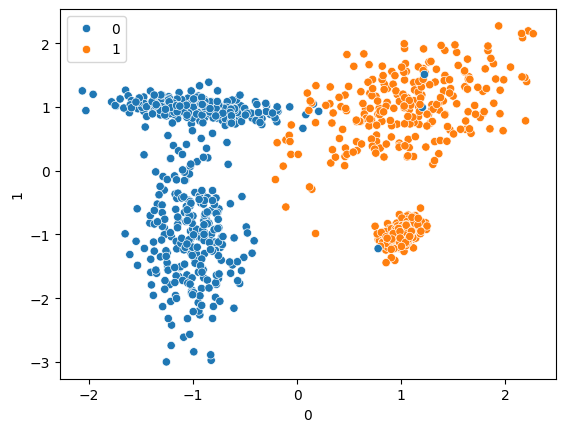

In [71]:
sns.scatterplot(x=x[0], y=x[1], hue=y)
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [73]:
from sklearn.svm import SVC

In [74]:
# When kernel = linear
svc = SVC(kernel='linear')

In [75]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [76]:
# prediction
y_pred_linear = svc.predict(X_test)

In [77]:
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
report = classification_report(y_test, y_pred_linear)
print(f'Classification Report:- \n{report}\n')

confusion_metric = confusion_matrix(y_test, y_pred_linear)
print(f'Confusion Matrix:- \n{confusion_metric}')

Classification Report:- 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       133
           1       0.99      0.97      0.98       117

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250


Confusion Matrix:- 
[[132   1]
 [  3 114]]


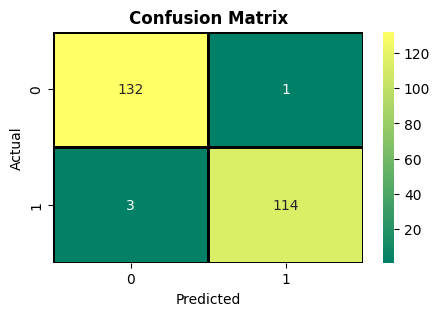

In [79]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_metric, annot=True, cmap='summer', cbar=True, fmt='d',linecolor='black', linewidths=2)
plt.title('Confusion Matrix', fontweight='bold', fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
# When kernel = rbf
rbf = SVC(kernel='rbf')

In [81]:
rbf.fit(X_train,y_train)

SVC()

In [82]:
# prediction
y_pred_rbf = rbf.predict(X_test)

In [83]:
confusion_metric = confusion_matrix(y_test, y_pred_rbf)
print(f'Confusion Matrix:- \n{confusion_metric}\n')

report = classification_report(y_test, y_pred_rbf)
print(f'Classification Report:- \n{report}')

Confusion Matrix:- 
[[132   1]
 [  2 115]]

Classification Report:- 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       133
           1       0.99      0.98      0.99       117

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250



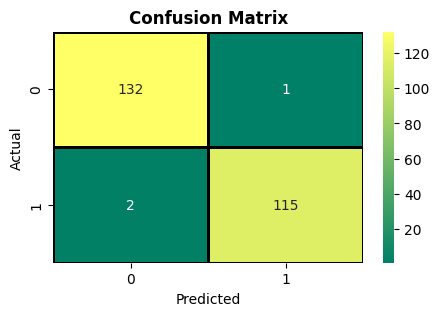

In [84]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_metric, annot=True, cmap='summer', cbar=True, fmt='d',linecolor='black', linewidths=2)
plt.title('Confusion Matrix', fontweight='bold', fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
# When kernel = polynomial
poly = SVC(kernel='poly')
poly.fit(X_train,y_train)

SVC(kernel='poly')

In [86]:
# prediction
y_pred_poly = poly.predict(X_test)

In [87]:
confusion_metric = confusion_matrix(y_test,y_pred_poly)
print(f'Confusion Matric:- \n{confusion_metric}\n')

report = classification_report(y_test, y_pred_poly)
print(f'Classification Report:- \n{report}')

Confusion Matric:- 
[[132   1]
 [  7 110]]

Classification Report:- 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       133
           1       0.99      0.94      0.96       117

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



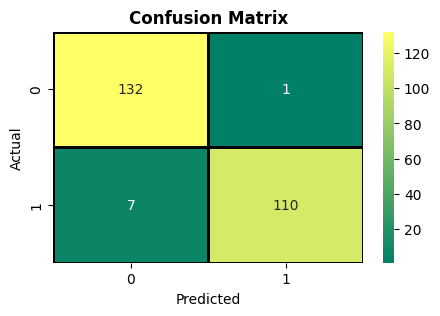

In [88]:
plt.figure(figsize=(5,3))
sns.heatmap(confusion_metric, annot=True, cmap='summer', cbar=True, fmt='d',linecolor='black', linewidths=2)
plt.title('Confusion Matrix', fontweight='bold', fontsize=12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()